# Gathering our Financial Data


In [28]:
import quandl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [9]:
quandl.ApiConfig.api_key = 'txBsKoTEKtqfi2UfGwZo'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


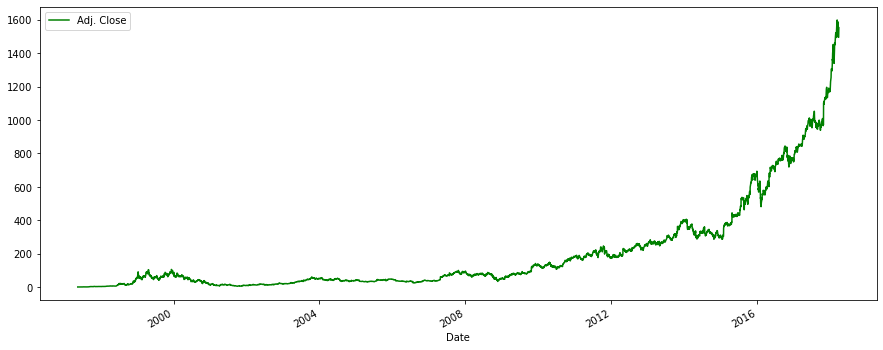

In [10]:
df['Adj. Close'].plot(figsize=(15, 6), color='g')
plt.legend(loc='upper left')
plt.show()

In [18]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)


X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

#get score accuracy
confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1498.97978872 1537.78745696 1549.16211834 1535.28099562 1556.16109299
 1571.63530553 1573.58949572 1589.77528838 1613.08750288 1602.49876582
 1602.99793396 1582.81879613 1590.04080335 1614.85052229 1629.75122249
 1637.56798326 1644.85371408 1673.5611928  1694.27136058 1683.42772914
 1686.42273802 1677.20405821 1665.90374102 1637.49363906 1681.65408913
 1676.71551066 1636.61212936 1585.05974249 1649.10195362 1586.64221172]


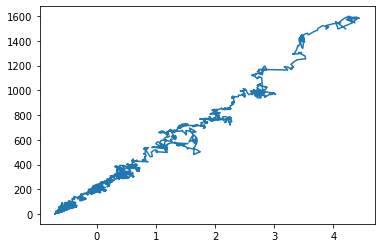

In [20]:
plt.plot(X, y)

In [38]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
print(dates)

DatetimeIndex(['2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
               '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26'],
              dtype='datetime64[ns]', freq='D')


(17282.0, 18029.5)

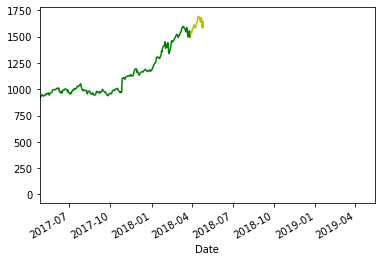

In [39]:
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))